In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
data = pd.read_csv("data/database2.csv",parse_dates=[['Date', 'Time']])
data.columns


Index(['Date_Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [14]:
# convert the date column into a DateTime format:
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

In [15]:
from pandas import DataFrame
data=data[data["Type"]=="Earthquake"]
data = data[['Date_Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
#select only the natural eartquakes, ie.remove nuclear explosions 

data.head()


,Date_Time,Latitude,Longitude,Depth,Magnitude
0,1965-01-02 13:44:18,19.246,145.616,131.6,6.0
1,1965-01-04 11:29:49,1.863,127.352,80.0,5.8
2,1965-01-05 18:05:58,-20.579,-173.972,20.0,6.2
3,1965-01-08 18:49:43,-59.076,-23.557,15.0,5.8
4,1965-01-09 13:32:50,11.938,126.427,15.0,5.8


In [16]:
#setting index 
#data.set_index("Date_Time",inplace=True)
#data

In [17]:
# import pandas_profiling
# report = pandas_profiling.ProfileReport(data)
# report

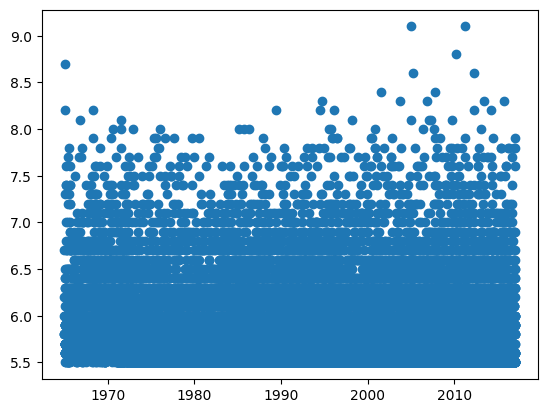

In [18]:
plt.scatter(x=data["Date_Time"],y=data.Magnitude);
plt.show()

In [34]:
number_earthquakes = data.groupby('Magnitude')["Magnitude"].count()
number_earthquakes

Magnitude
5.50    4664
5.51       1
5.52       1
5.53       1
5.55       1
5.58       1
5.60    3941
5.64       1
5.66       2
5.67       1
5.69       1
5.70    3064
5.72       1
5.73       1
5.75       2
5.77       2
5.80    2327
5.82       1
5.84       1
5.88       1
5.89       1
5.90    1915
5.94       1
5.97       1
6.00    1558
6.02       1
6.10    1195
6.20     904
6.30     763
6.31       1
6.35       2
6.40     572
6.45       1
6.47       1
6.48       1
6.50     462
6.57       1
6.60     363
6.70     312
6.80     235
6.90     186
7.00     168
7.10     123
7.20     102
7.30      63
7.40      59
7.50      43
7.60      49
7.70      39
7.80      31
7.90      21
8.00      13
8.10       7
8.20       7
8.30       5
8.40       2
8.60       2
8.70       1
8.80       1
9.10       2
Name: Magnitude, dtype: int64

In [42]:
data.groupby('Magnitude').count()

,Date_Time,Latitude,Longitude,Depth
Magnitude,,,,
5.50,4664,4664,4664,4664
5.51,1,1,1,1
5.52,1,1,1,1
5.53,1,1,1,1
5.55,1,1,1,1
5.58,1,1,1,1
5.60,3941,3941,3941,3941
5.64,1,1,1,1
5.66,2,2,2,2


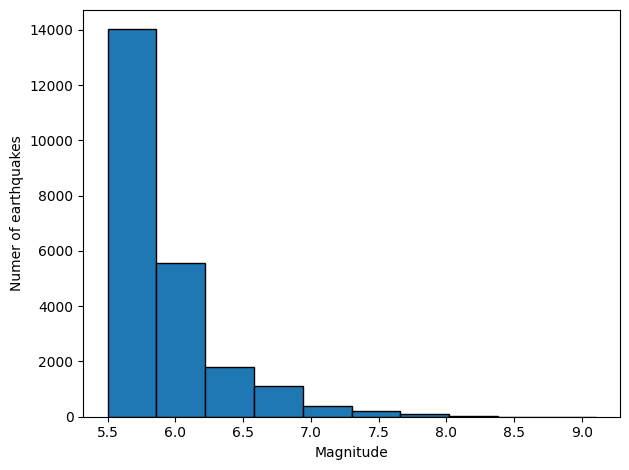

<AxesSubplot: ylabel='Frequency'>

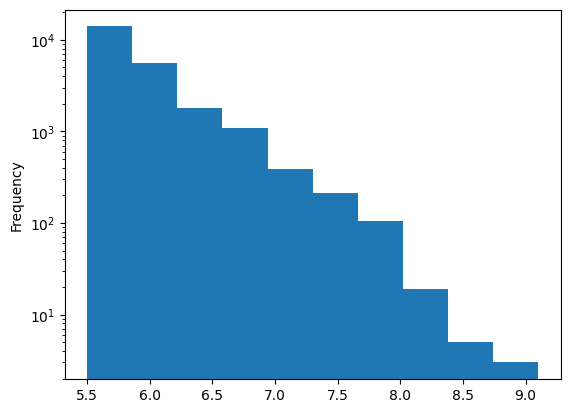

In [49]:
from matplotlib import pyplot as plt 
plt.hist((data['Magnitude']), edgecolor='black',bins=10,label='Car')
plt.xlabel('Magnitude')
plt.ylabel('Numer of earthquakes')
 
plt.tight_layout()
 
plt.show()


data['Magnitude'].plot(kind='hist', logy=True)

# # histogram
# pyplot.subplot(212)
# pyplot.hist(data)
# pyplot.show()

In [ ]:
from mpl_toolkits.basemap import Basemap

#m = Basemap(projection='erc',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
#m = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)



longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)


fig = plt.figure(figsize=(12,10))
plt.title("All eartquake affected areas")
m.plot(x, y, "*", markersize = 2, color = 'blue')
m.drawcoastlines()

#m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua',alpha=0.5)
#m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
#m.drawmapboundary()
m.drawcountries()

plt.show()


In [ ]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)


In [ ]:
reg.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

In [ ]:
best_fit.score(X_test, y_test)